Mean Absolute Error (MAE): 1.60
Mean Squared Error (MSE): 3.67
Root Mean Squared Error (RMSE): 1.92
R-squared (R²): 0.93


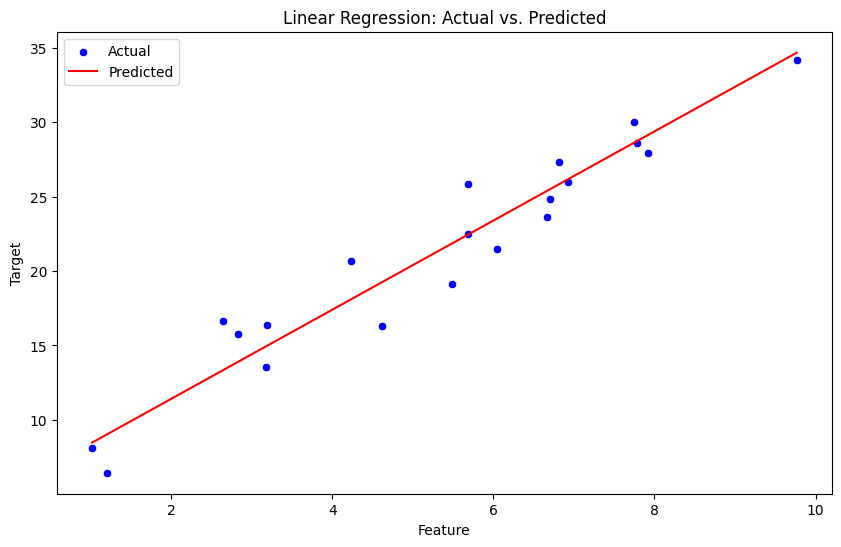

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Sample Data Generation (or load your dataset here)
# Let's create a synthetic dataset for demonstration
np.random.seed(0)
X = np.random.rand(100, 1) * 10  # Features
y = 3 * X.squeeze() + 5 + np.random.randn(100) * 2  # Target with some noise

# Convert to DataFrame for better visualization (optional)
data = pd.DataFrame({'Feature': X.squeeze(), 'Target': y})

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Model performance analysis
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Display performance metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

# Visualizing the results
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test.squeeze(), y=y_test, label='Actual', color='blue')
sns.lineplot(x=X_test.squeeze(), y=y_pred, label='Predicted', color='red')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Linear Regression: Actual vs. Predicted')
plt.legend()
plt.show()


Accuracy: 0.90


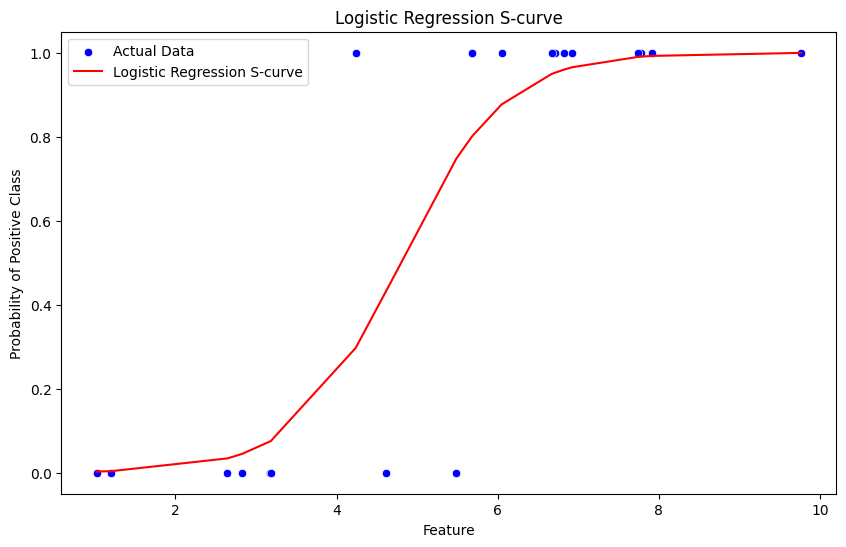

In [4]:
# Importing necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Sample Data Generation (or load your dataset here)
np.random.seed(0)
X = np.random.rand(100, 1) * 10  # Features
y = (3 * X.squeeze() + 5 + np.random.randn(100) * 2 > 20).astype(int)  # Binary Target

# Convert to DataFrame for better visualization (optional)
data = pd.DataFrame({'Feature': X.squeeze(), 'Target': y})

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # Probabilities of the positive class

# Sort the feature values and corresponding probabilities for plotting the S-curve
X_sorted = np.sort(X_test.squeeze())
y_prob_sorted = model.predict_proba(X_sorted.reshape(-1, 1))[:, 1]

# Display performance metrics
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Plotting the S-curve (Sigmoid function)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test.squeeze(), y=y_test, color='blue', label='Actual Data')
plt.plot(X_sorted, y_prob_sorted, color='red', label='Logistic Regression S-curve')
plt.xlabel('Feature')
plt.ylabel('Probability of Positive Class')
plt.title('Logistic Regression S-curve')
plt.legend()
plt.show()
